In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [2]:
data = pd.read_csv('history_export.txt', sep="|", error_bad_lines=False)
data.columns = ["Time", "URL"]

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.index = data['Time']
del data['Time']
domainList = [0]*len(data)
len(data)
data = data[0:200]

In [5]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'nsrivast@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [8]:

for idx in range(len(data)):
    print(idx)
    url = data.URL[idx]
    if(len(url)>5):
        try:
            r = requests.get(url, headers=headers)
        except:
            r = ''
            pass
        if(type(r)!=str):
            soup = BeautifulSoup(r.text, 'lxml')
            if(len(soup('title'))>0):
                if(soup('title')[0].string is not None):
                    domainList[idx] = soup('title')[0].string.encode('utf-8').strip()     
                else:
                    domainList[idx] = "Null"
            else:
                domainList[idx] = "Null"
        else:
            domainList[idx] = "Null"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [ ]:
data.to_csv('chrome_history.csv')

In [77]:
data = pd.read_csv('chrome_history.csv')
print(type(data))
data.Time = pd.to_datetime(data.Time)
docs = data.Domain.unique()
docs = data

<class 'pandas.core.frame.DataFrame'>


In [78]:
data.head()

Time                                                URL
0 2017-02-11 16:40:22        https://www.youtube.com/watch?v=-Me8r-V4MUQ
1 2017-02-11 16:36:35  https://www.google.co.in/url?sa=t&rct=j&q=&esr...
2 2017-02-11 16:36:24  https://chrome.google.com/webstore/category/ex...
3 2017-02-11 16:36:13  https://chrome.google.com/webstore/detail/expo...
4 2017-02-11 16:36:12  https://www.google.co.in/url?sa=t&rct=j&q=&esr...

In [79]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [80]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [87]:
# doc_set = docs.tolist()
doc_set = docs['URL']
print(doc_set)

0            https://www.youtube.com/watch?v=-Me8r-V4MUQ
1      https://www.google.co.in/url?sa=t&rct=j&q=&esr...
2      https://chrome.google.com/webstore/category/ex...
3      https://chrome.google.com/webstore/detail/expo...
4      https://www.google.co.in/url?sa=t&rct=j&q=&esr...
5      https://yuji.wordpress.com/2014/03/10/export-c...
6      http://www.cse.iitk.ac.in/users/nsrivast/HCC/S...
7      http://www.cse.iitk.ac.in/users/nsrivast/hcc.html
8      http://superuser.com/questions/602252/can-chro...
9      https://www.google.co.in/url?sa=t&rct=j&q=&esr...
10     https://www.google.co.in/?gfe_rd=cr&ei=Gj2fWOz...
11     https://authenticate.iitk.ac.in/netaccess/logi...
12     https://authenticate.iitk.ac.in/netaccess/conn...
13                                http://www.google.com/
14                               https://www.google.com/
15     https://www.google.co.in/?gfe_rd=cr&ei=Gj2fWOz...
16        https://webmail.cse.iitk.ac.in/src/signout.php
17     https://webmail.iitk.ac.

In [89]:
texts = []

# loop through document list
for i in doc_set:
    try:
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass

In [90]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [91]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [92]:
ldamodel.print_topics(3)

[(0,
  '0.089*"http" + 0.051*"www" + 0.041*"ac" + 0.041*"iitk" + 0.033*"com" + 0.030*"php" + 0.028*"webmail" + 0.023*"src" + 0.021*"googl" + 0.021*"cse"'),
 (1,
  '0.048*"http" + 0.029*"com" + 0.023*"url" + 0.022*"googl" + 0.019*"www" + 0.019*"2f" + 0.016*"3a" + 0.016*"mail" + 0.014*"q" + 0.013*"d"'),
 (2,
  '0.061*"http" + 0.030*"php" + 0.027*"moodl" + 0.026*"cse" + 0.025*"iitk" + 0.025*"ac" + 0.021*"site" + 0.020*"com" + 0.019*"file" + 0.017*"pdf"')]

In [93]:
ldamodel.get_topic_terms(0,10)

[(0, 0.089241325063554144),
 (2, 0.050997388727723449),
 (68, 0.041295514037766927),
 (69, 0.040568544478500078),
 (5, 0.033377490335221319),
 (101, 0.0295746281422236),
 (103, 0.027817636616404601),
 (100, 0.022867076812417689),
 (27, 0.021085398175217991),
 (67, 0.020830094236554384)]

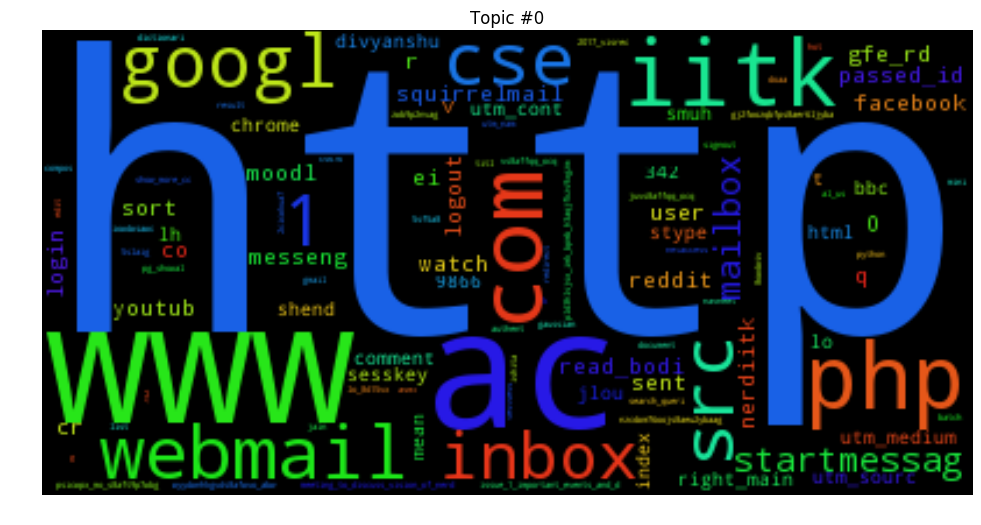

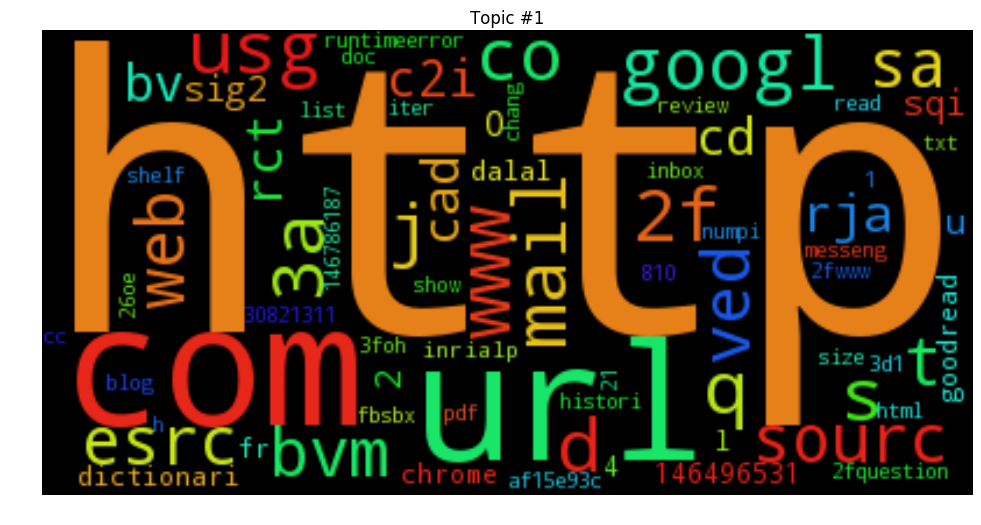

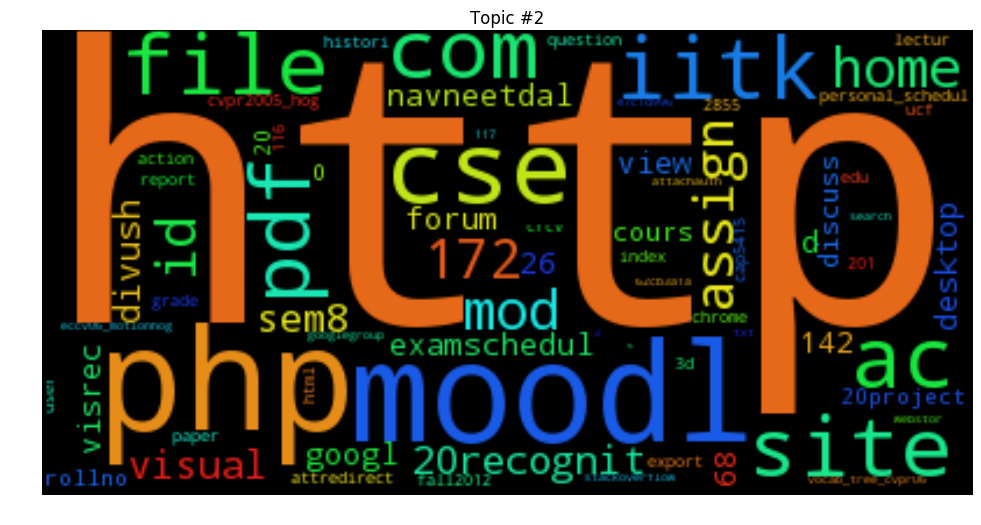

In [95]:
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    plt.figure(figsize=(12,8))
    plt.imshow(WordCloud().fit_words(ldamodel.show_topic(t, 200)))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.show()

In [96]:
topic = [0]*len(data)
for idx in range(len(data)):
    test_idx = doc_set.index(data.Domain[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

AttributeError: 'DataFrame' object has no attribute 'Domain'

In [19]:
data['Topic'] = topic

In [20]:
data.head()

Time                                                URL  \
0 2017-02-08 09:55:00    http://www.moneycontrol.com/stocksmarketsindia/   
1 2017-02-08 09:55:00                       http://www.moneycontrol.com/   
2 2017-02-08 09:54:00                               http://www.ndtv.com/   
3 2017-02-08 05:07:00  http://localhost:8888/notebooks/Untitled.ipynb...   
4 2017-02-08 05:07:00                        http://localhost:8888/tree#   

                                              Domain  Topic  
0  Indian Stock/Share Market Live - BSE Sensex, N...      1  
1  Stock/Share Market Investing - Live BSE/NSE, I...      1  
2  NDTV: Latest News, India News, Breaking News, ...      1  
3                                   Jupyter Notebook      1  
4                                               Home      2

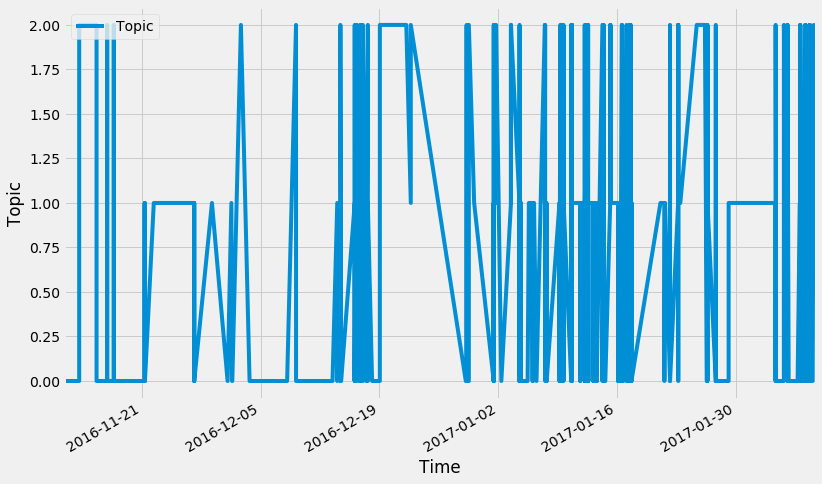

In [21]:
sorted_data = data.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.show()

In [22]:
cp_data = data

In [ ]:
cp_data.head()

In [23]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

URL  \
Time                                                                     
2017-02-08 09:55:00    http://www.moneycontrol.com/stocksmarketsindia/   
2017-02-08 09:55:00                       http://www.moneycontrol.com/   
2017-02-08 09:54:00                               http://www.ndtv.com/   
2017-02-08 05:07:00  http://localhost:8888/notebooks/Untitled.ipynb...   
2017-02-08 05:07:00                        http://localhost:8888/tree#   

                                                                Domain  Topic  
Time                                                                           
2017-02-08 09:55:00  Indian Stock/Share Market Live - BSE Sensex, N...      1  
2017-02-08 09:55:00  Stock/Share Market Investing - Live BSE/NSE, I...      1  
2017-02-08 09:54:00  NDTV: Latest News, India News, Breaking News, ...      1  
2017-02-08 05:07:00                                   Jupyter Notebook      1  
2017-02-08 05:07:00                                               Home      2

In [24]:
occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for day in weekdays:
    tlist = cp_data[cp_data.index.weekday_name == day].Topic.tolist()
    res = np.histogram(tlist,bins=[0,1,2,3])
    occurrences.append(list(res[0]))

In [25]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

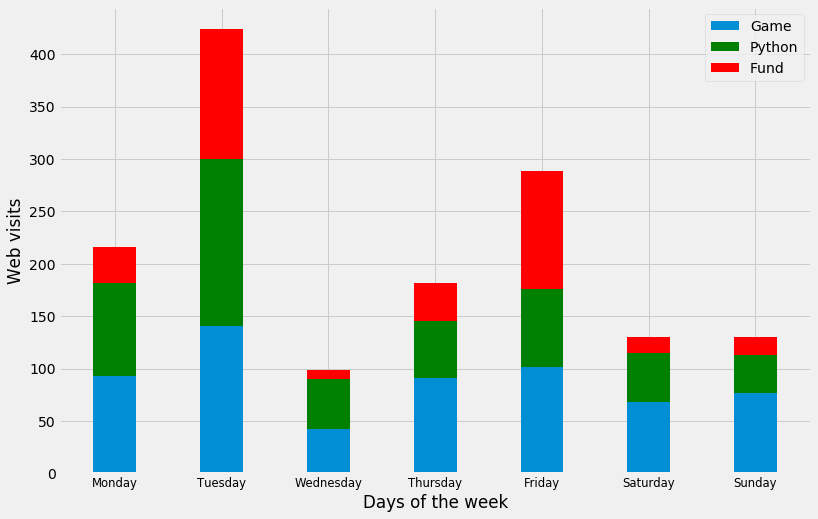

In [27]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Game')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Python')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='Fund')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()